# TEMPLATE 1 - PREPROCESSING

# Libraries

In [ ]:
import pandas as pd     # Manejo de dataframes
import numpy as np      # Calculos matriciales
import matplotlib.pyplot as plt    # Visualizacion
import seaborn as sns              # Visualizacion
from google.colab import drive     # Drive en Colab


import warnings
warnings.filterwarnings("ignore")  # inhabilita warnings

In [ ]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import data

In [ ]:
#pau 
df = pd.read_csv('/content/drive/MyDrive/DATA SCIENCE/ML- SUPERVISADO/Entregable/telecom_churn_TRAINTEST.csv',index_col =0)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Entregable/telecom_churn_TRAINTEST.csv',index_col =0)

In [ ]:
df.reset_index(level=None, drop=False, inplace=True, col_level=0, col_fill='')

In [ ]:
len(df.index.unique())==len(df.index)

True

# Define target

In [ ]:
target = 'churn'

el modelo es balanceado así q perfe, no deberemos aplicar ninguna tecnica para equilibralo más. 

# Preprocessing

In [ ]:
df.head()

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,0.0,I,U,U,U,U,U,Y,434.0,1000005


In [ ]:
df.columns.values

array(['rev', 'mou', 'totmrc', 'da', 'ovrmou', 'ovrrev', 'vceovr',
       'datovr', 'roam', 'change_mou', 'change_rev', 'drop_vce',
       'drop_dat', 'blck_vce', 'blck_dat', 'unan_vce', 'unan_dat',
       'plcd_vce', 'plcd_dat', 'recv_vce', 'recv_sms', 'comp_vce',
       'comp_dat', 'custcare', 'ccrndmou', 'cc_mou', 'inonemin',
       'threeway', 'mou_cvce', 'mou_cdat', 'mou_rvce', 'owylis_vce',
       'mouowylisv', 'iwylis_vce', 'mouiwylisv', 'peak_vce', 'peak_dat',
       'mou_peav', 'mou_pead', 'opk_vce', 'opk_dat', 'mou_opkv',
       'mou_opkd', 'drop_blk', 'attempt', 'complete', 'callfwdv',
       'callwait', 'churn', 'months', 'uniqsubs', 'actvsubs', 'new_cell',
       'crclscod', 'asl_flag', 'totcalls', 'totmou', 'totrev', 'adjrev',
       'adjmou', 'adjqty', 'avgrev', 'avgmou', 'avgqty', 'avg3mou',
       'avg3qty', 'avg3rev', 'avg6mou', 'avg6qty', 'avg6rev',
       'prizm_social_one', 'area', 'dualband', 'refurb_new', 'hnd_price',
       'phones', 'models', 'hnd_webcap', 'tru

In [ ]:
df.shape

(90000, 100)

In [ ]:
col = df.columns
print('Number of columns :', len(col))

Number of columns : 100


In [ ]:

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)



In [ ]:
df.dtypes

## EDA: Analysis

### Target distribution

In [ ]:
df.churn.unique() #target binario

array([1, 0])

In [ ]:
# lo definimos arriba : target = 'churn'
features = df.columns[df.columns != target]

y = df[target]
X = df[features]

In [ ]:
pd.Series(y).value_counts()

1    45800
0    44200
Name: churn, dtype: int64

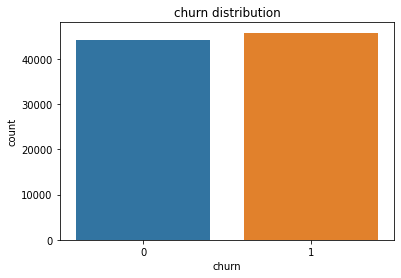

In [ ]:
sns.countplot(x=target, data=df)
plt.title(target+' distribution')
plt.show()

Observamos que la distribucion de gente que abandona y se queda es muy similar. No parece un modelo desbalanceado. 

## Data Cleaning

* Eliminar filas sin target informado.
* Eliminar filas duplicadas (si tenemos ID, solo puede haber 1 registro por ID)
* Eliminar filas/columnas vacías y columnas irrelevantes
* Corregir data types incorrectos
* Categoricos: Corregir literales incorrectos (acentos, erratas, etc)
* Fechas y textos: convertir a variables numericas (hour, day, month, year...) o categoricas (weekday_name...)

In [ ]:
df.dropna(axis=0, subset=['churn'], inplace=True) #eliminacion de filas sin target informado

In [ ]:
dupl_rows = df.duplicated().sum()
print("The number of duplicated rows is:", dupl_rows) #vemos que no hay filas duplicadas.

The number of duplicated rows is: 0


Ahora miramos la presencia de nulos en las demas columnas:

In [ ]:
df.isnull().sum().sum() #observamos que existen 295.350 valores nulos

295350

In [ ]:
print('El numero de nulos es:\n ',df.isnull().sum())

El numero de nulos es:
  rev                   134
mou                   134
totmrc                134
da                    134
ovrmou                134
ovrrev                134
vceovr                134
datovr                134
roam                  134
change_mou            595
change_rev            595
drop_vce                0
drop_dat                0
blck_vce                0
blck_dat                0
unan_vce                0
unan_dat                0
plcd_vce                0
plcd_dat                0
recv_vce                0
recv_sms                0
comp_vce                0
comp_dat                0
custcare                0
ccrndmou                0
cc_mou                  0
inonemin                0
threeway                0
mou_cvce                0
mou_cdat                0
mou_rvce                0
owylis_vce              0
mouowylisv              0
iwylis_vce              0
mouiwylisv              0
peak_vce                0
peak_dat                0
mou_peav     

In [ ]:
df.columns[df.isnull().any()] #filtramos por las columnas que presnetan algun valor nulo

Index(['rev', 'mou', 'totmrc', 'da', 'ovrmou', 'ovrrev', 'vceovr', 'datovr',
       'roam', 'change_mou', 'change_rev', 'avg6mou', 'avg6qty', 'avg6rev',
       'prizm_social_one', 'area', 'dualband', 'refurb_new', 'hnd_price',
       'phones', 'models', 'hnd_webcap', 'truck', 'rv', 'ownrent', 'lor',
       'dwlltype', 'marital', 'adults', 'infobase', 'income', 'numbcars',
       'HHstatin', 'dwllsize', 'forgntvl', 'ethnic', 'kid0_2', 'kid3_5',
       'kid6_10', 'kid11_15', 'kid16_17', 'creditcd', 'eqpdays'],
      dtype='object')

In [ ]:
null_cols = df.isnull().sum()

null_cols = null_cols[null_cols > 0].sort_values(ascending=False)

print(null_cols) #aquí obtenemos ordenada solo las columnas con valores nulos y cuantos hay en cada

numbcars            43568
dwllsize            33764
HHstatin            33032
ownrent             29491
dwlltype            27978
lor                 26502
income              22196
adults              20033
infobase            19403
hnd_webcap           9519
prizm_social_one     6537
kid0_2               1451
kid3_5               1451
creditcd             1451
kid16_17             1451
kid11_15             1451
rv                   1451
truck                1451
kid6_10              1451
marital              1451
ethnic               1451
forgntvl             1451
avg6qty              1407
avg6rev              1407
avg6mou              1407
hnd_price             704
change_mou            595
change_rev            595
rev                   134
mou                   134
roam                  134
datovr                134
vceovr                134
ovrrev                134
ovrmou                134
da                    134
totmrc                134
area                   40
models      

In [ ]:
null_freq = df.isnull().sum()/len(df)*100

null_freq = null_freq[null_freq > 0].sort_values(ascending=False)

print(null_freq) #aquí valoramos su frequencia

numbcars            48.408889
dwllsize            37.515556
HHstatin            36.702222
ownrent             32.767778
dwlltype            31.086667
lor                 29.446667
income              24.662222
adults              22.258889
infobase            21.558889
hnd_webcap          10.576667
prizm_social_one     7.263333
kid0_2               1.612222
kid3_5               1.612222
creditcd             1.612222
kid16_17             1.612222
kid11_15             1.612222
rv                   1.612222
truck                1.612222
kid6_10              1.612222
marital              1.612222
ethnic               1.612222
forgntvl             1.612222
avg6qty              1.563333
avg6rev              1.563333
avg6mou              1.563333
hnd_price            0.782222
change_mou           0.661111
change_rev           0.661111
rev                  0.148889
mou                  0.148889
roam                 0.148889
datovr               0.148889
vceovr               0.148889
ovrrev    

Antes de seguir con la limpieza obtenemos listas que dividen nuestras columnas en diferentes datatypes para facilitar el código y análisis

In [ ]:
# Identificar las variables numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Identificar las variables categóricas
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Identificar las variables booleanas
boolean_cols = df.select_dtypes(include=['bool']).columns

In [ ]:
#imprimimos el nombre de las columnas agrupadas en cada lista
print("Variables numéricas:")
print(numeric_cols)

# variables cate
print("\nVariables categóricas:")
print(categorical_cols)

#  variables bool
print("\nVariables booleanas:")
print(boolean_cols)

Variables numéricas:
Index(['rev', 'mou', 'totmrc', 'da', 'ovrmou', 'ovrrev', 'vceovr', 'datovr',
       'roam', 'change_mou', 'change_rev', 'drop_vce', 'drop_dat', 'blck_vce',
       'blck_dat', 'unan_vce', 'unan_dat', 'plcd_vce', 'plcd_dat', 'recv_vce',
       'recv_sms', 'comp_vce', 'comp_dat', 'custcare', 'ccrndmou', 'cc_mou',
       'inonemin', 'threeway', 'mou_cvce', 'mou_cdat', 'mou_rvce',
       'owylis_vce', 'mouowylisv', 'iwylis_vce', 'mouiwylisv', 'peak_vce',
       'peak_dat', 'mou_peav', 'mou_pead', 'opk_vce', 'opk_dat', 'mou_opkv',
       'mou_opkd', 'drop_blk', 'attempt', 'complete', 'callfwdv', 'callwait',
       'churn', 'months', 'uniqsubs', 'actvsubs', 'totcalls', 'totmou',
       'totrev', 'adjrev', 'adjmou', 'adjqty', 'avgrev', 'avgmou', 'avgqty',
       'avg3mou', 'avg3qty', 'avg3rev', 'avg6mou', 'avg6qty', 'avg6rev',
       'hnd_price', 'phones', 'models', 'truck', 'rv', 'lor', 'adults',
       'income', 'numbcars', 'forgntvl', 'eqpdays', 'Customer_ID'],
      dt

Imputamos en los nulos la media en las columnas numericas y la moda en los 'NaN' de las columnas categoricas. No tenemos columnas booleans

In [ ]:
nul_cols = df.columns[df.isnull().any()].tolist()

# Determinar si las columnas son numéricas o categóricas con nulos
n_cols = df[nul_cols].select_dtypes(include=['float64', 'int64']).columns
c_cols = df[nul_cols].select_dtypes(include=['object', 'category']).columns

# Imprimir los resultados
print("Columnas con valores nulos:", nul_cols)
print("Columnas numéricas con valores nulos:", n_cols)
print("Columnas categóricas con valores nulos:", c_cols)

Columnas con valores nulos: ['rev', 'mou', 'totmrc', 'da', 'ovrmou', 'ovrrev', 'vceovr', 'datovr', 'roam', 'change_mou', 'change_rev', 'avg6mou', 'avg6qty', 'avg6rev', 'prizm_social_one', 'area', 'dualband', 'refurb_new', 'hnd_price', 'phones', 'models', 'hnd_webcap', 'truck', 'rv', 'ownrent', 'lor', 'dwlltype', 'marital', 'adults', 'infobase', 'income', 'numbcars', 'HHstatin', 'dwllsize', 'forgntvl', 'ethnic', 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd', 'eqpdays']
Columnas numéricas con valores nulos: Index(['rev', 'mou', 'totmrc', 'da', 'ovrmou', 'ovrrev', 'vceovr', 'datovr',
       'roam', 'change_mou', 'change_rev', 'avg6mou', 'avg6qty', 'avg6rev',
       'hnd_price', 'phones', 'models', 'truck', 'rv', 'lor', 'adults',
       'income', 'numbcars', 'forgntvl', 'eqpdays'],
      dtype='object')
Columnas categóricas con valores nulos: Index(['prizm_social_one', 'area', 'dualband', 'refurb_new', 'hnd_webcap',
       'ownrent', 'dwlltype', 'marital', 'infobase', '

## Nulls: impute values

Numericas con nulos:
Para las numericas lo que hacemos es imputar la moda quellas que tengan una distrubucion poco equilibrada, una categoria se lleve la mayor parte de la frecuencia y la mediaa en aquellas en q las frecuencias esten más equilibradas o repartidas

In [ ]:
df[numeric_cols].describe()

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,churn,months,uniqsubs,actvsubs,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,hnd_price,phones,models,truck,rv,lor,adults,income,numbcars,forgntvl,eqpdays,Customer_ID
count,89866.000000,89866.000000,89866.000000,89866.000000,89866.000000,89866.000000,89866.000000,89866.000000,89866.000000,89405.000000,89405.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,88593.000000,88593.000000,88593.000000,89296.000000,89999.000000,89999.000000,88549.000000,88549.000000,63498.000000,69967.000000,67804.000000,46432.000000,88549.000000,89999.000000,9.000000e+04
mean,58.312895,504.277946,45.880669,0.877813,40.798976,13.289932,13.046046,0.240786,1.308197,-13.786987,-1.074666,5.769639,0.037837,3.999448,0.019737,26.843561,0.027811,141.375341,0.805435,53.713298,0.047781,106.483091,0.720050,1.648754,4.344852,3.444618,28.909037,0.269522,221.363949,1.689888,109.071366,24.268663,27.785579,7.712004,17.676245,86.999369,0.334957,171.309285,0.654335,64.103954,0.385096,159.080481,1.035109,9.826661,142.180776,107.203141,0.010415,1.732817,0.508889,19.263856,1.555067,1.366522,2970.669433,7874.976570,1065.717715,994.546384,7776.807032,2931.320344,57.288343,472.052308,170.568866,510.539844,178.227000,58.802889,501.598490,176.320082,58.266691,99.709575,1.802987,1.556184,0.197190,0.086867,6.180856,2.538197,5.809274,1.568896,0.059255,402.419438,1.045000e+06
std,46.084103,516.170057,23.370435,2.173665,96.970619,30.123282,29.719581,3.012631,15.374215,271.624916,50.565668,8.673272,0.885448,10.603489,0.699317,37.315217,0.501246,155.486573,8.455179,85.537833,2.176283,116.845898,7.679230,5.148484,12.141729,10.049161,54.960177,1.003104,257.220079,21.905864,160.081469,33.913196,47.948938,15.908932,40.382222,102.308064,3.890521,205.794020,7.335297,89.736523,4.393926,228.966797,16.988064,15.081650,156.468555,117.776670,0.465963,5.260407,0.499924,9.149764,1.095305,0.661085,3887.921200,8869.646079,865.305299,851.715318,8802.189472,3855.692056,35.430616,425.257319,165.134394,524.737209,191.398108,46.476204,489.911616,181.593174,40.483529,60.788920,1.319121,0.900798,0.397879,0.281642,4.741242,1.452650,2.176928,0.628308,0.236103,252.821660,2.598091e+04
min,-5.862500,0.000000,-26.915000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.740000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,0.000000,0.000000,23.750000,9.320000,0.000000,0.000000,2.910000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-2.000000,9.989998,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-5.000000,1.000001e+06
25%,3

In [ ]:
umbral = 0.2

# Identificar aquellas columnas numéricas que tienen la categoría más frecuente con una frecuencia relativa mayor al umbral
selected_cols = []
for col in numeric_cols:
    freq = df[col].value_counts(normalize=True)
    max_freq = freq.max()
    second_max_freq = freq[freq != max_freq].max()
    if max_freq - second_max_freq >= max_freq * umbral:
        selected_cols.append(col)

print('Las columnas numéricas seleccionadas son: ', selected_cols)


Las columnas numéricas seleccionadas son:  ['rev', 'mou', 'da', 'ovrmou', 'ovrrev', 'vceovr', 'datovr', 'roam', 'change_mou', 'change_rev', 'drop_vce', 'drop_dat', 'blck_vce', 'blck_dat', 'unan_vce', 'unan_dat', 'plcd_vce', 'plcd_dat', 'recv_vce', 'recv_sms', 'comp_vce', 'comp_dat', 'custcare', 'ccrndmou', 'cc_mou', 'inonemin', 'threeway', 'mou_cvce', 'mou_cdat', 'mou_rvce', 'owylis_vce', 'mouowylisv', 'iwylis_vce', 'mouiwylisv', 'peak_vce', 'peak_dat', 'mou_peav', 'mou_pead', 'opk_vce', 'opk_dat', 'mou_opkv', 'mou_opkd', 'drop_blk', 'attempt', 'complete', 'callfwdv', 'callwait', 'uniqsubs', 'actvsubs', 'adjmou', 'avgmou', 'avg3mou', 'avg3qty', 'avg3rev', 'avg6mou', 'avg6qty', 'avg6rev', 'phones', 'models', 'truck', 'rv', 'income', 'forgntvl']


In [ ]:
other_cols = [col for col in numeric_cols if col not in selected_cols]

In [ ]:
other_cols.remove('churn')

In [ ]:
other_cols

['totmrc',
 'months',
 'totcalls',
 'totmou',
 'totrev',
 'adjrev',
 'adjqty',
 'avgrev',
 'avgqty',
 'hnd_price',
 'lor',
 'adults',
 'numbcars',
 'eqpdays',
 'Customer_ID']

In [ ]:
for i in other_cols:
  
    print(i)
    print('Unique:',df[i].nunique())
    print(df[i].value_counts()/len(df),'\n') #veo q estoy d acuerdo con las columnas q les impuatre la meida

totmrc
Unique: 7676
44.9900    0.106667
29.9900    0.092200
59.9900    0.084711
39.9900    0.080533
10.0000    0.061122
             ...   
48.6950    0.000011
5.6475     0.000011
25.8250    0.000011
89.7775    0.000011
34.9650    0.000011
Name: totmrc, Length: 7676, dtype: float64 

months
Unique: 56
11    0.079711
12    0.066944
13    0.062711
14    0.050500
19    0.043278
15    0.042578
23    0.040256
16    0.039978
10    0.039578
21    0.039556
17    0.038889
25    0.034000
18    0.033556
9     0.031589
20    0.030989
22    0.027856
7     0.026211
24    0.025867
8     0.023556
26    0.021167
27    0.020722
29    0.017011
28    0.016789
31    0.016322
30    0.014411
33    0.012833
32    0.012233
35    0.011456
34    0.010144
37    0.008644
6     0.008322
36    0.007844
38    0.005578
39    0.004978
41    0.003811
40    0.003189
43    0.003089
47    0.002689
42    0.002622
45    0.002600
44    0.002389
49    0.002244
46    0.002144
48    0.002133
50    0.001622
51    0.001522
53    0

In [ ]:
for i in numeric_cols:
  
    print(i)
    print('Unique:',df[i].nunique())
    print(df[i].value_counts()/len(df),'\n')

Se han truncado las últimas 5000 líneas del flujo de salida.
0.666667      0.087056
1.000000      0.059289
1.333333      0.050389
1.666667      0.039044
2.000000      0.034111
2.333333      0.029000
2.666667      0.024033
3.000000      0.020622
3.333333      0.019467
3.666667      0.016800
4.000000      0.014733
4.333333      0.013222
4.666667      0.012589
5.000000      0.011256
5.333333      0.009956
5.666667      0.008778
6.000000      0.008478
6.333333      0.007744
6.666667      0.007278
7.000000      0.006522
7.333333      0.006067
7.666667      0.005511
8.000000      0.005211
8.333333      0.004767
8.666667      0.004589
9.000000      0.004456
9.333333      0.003967
9.666667      0.003844
10.333333     0.003700
10.000000     0.003478
10.666667     0.003456
11.333333     0.003278
12.000000     0.002756
11.000000     0.002733
11.666667     0.002600
13.000000     0.002422
12.333333     0.002389
13.333333     0.002333
12.666667     0.002200
13.666667     0.001978
14.333333     0.001

In [ ]:
# Imputar la moda a los valores nulos en las columnas seleccionadas previamente
for col in selected_cols:
    mode = df[col].mode()[0]
    df[col] = df[col].fillna(mode)

# Imputar la media a los valores nulos en las columnas que no forman parte de la lista de columnas seleccionadas previamente

for col in other_cols:
    mean = df[col].mean()
    df[col] = df[col].fillna(mean)

# Verificar que no haya valores nulos en el dataset
print(df.isnull().sum())

rev                     0
mou                     0
totmrc                  0
da                      0
ovrmou                  0
ovrrev                  0
vceovr                  0
datovr                  0
roam                    0
change_mou              0
change_rev              0
drop_vce                0
drop_dat                0
blck_vce                0
blck_dat                0
unan_vce                0
unan_dat                0
plcd_vce                0
plcd_dat                0
recv_vce                0
recv_sms                0
comp_vce                0
comp_dat                0
custcare                0
ccrndmou                0
cc_mou                  0
inonemin                0
threeway                0
mou_cvce                0
mou_cdat                0
mou_rvce                0
owylis_vce              0
mouowylisv              0
iwylis_vce              0
mouiwylisv              0
peak_vce                0
peak_dat                0
mou_peav                0
mou_pead    

los numericos booleanos les imputamos 0

In [ ]:
df.isnull().sum()

rev                     0
mou                     0
totmrc                  0
da                      0
ovrmou                  0
ovrrev                  0
vceovr                  0
datovr                  0
roam                    0
change_mou              0
change_rev              0
drop_vce                0
drop_dat                0
blck_vce                0
blck_dat                0
unan_vce                0
unan_dat                0
plcd_vce                0
plcd_dat                0
recv_vce                0
recv_sms                0
comp_vce                0
comp_dat                0
custcare                0
ccrndmou                0
cc_mou                  0
inonemin                0
threeway                0
mou_cvce                0
mou_cdat                0
mou_rvce                0
owylis_vce              0
mouowylisv              0
iwylis_vce              0
mouiwylisv              0
peak_vce                0
peak_dat                0
mou_peav                0
mou_pead    

* Imputar cero, valor fijo, media o moda

##NULOS EN LAS CATEGORICAS

In [ ]:
def fill_na(df):

    
    # Llenar los valores nulos de las variables categóricas con la moda
    df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])
    
    return df

In [ ]:
fill_na(df)

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,churn,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.000,0.0,0.000,0.0000,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.000000,52.333333,0.000000,42.333333,0.0,45.000000,0.0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61,2,1,U,A,N,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,S,NORTHWEST/ROCKY MOUNTAIN AREA,Y,N,149.989990,2.0,2.0,WCMB,0.0,0.0,O,15.0,S,S,1.0,M,4.0,3.0,C,A,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.100,9.1,0.000,0.0000,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.000000,263.333333,0.000000,69.000000,0.0,193.333333,0.0,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,0,56,1,1,N,EA,N,14654,26400.00000,2851.68,2833.88,26367.00,14624,51.53,479.40,265.89,305,158,40,477.0,275.0,48.0,U,CHICAGO AREA,N,N,99.709575,7.0,6.0,WC,1.0,1.0,O,1.0,S,S,1.0,M,5.0,1.0,C,A,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.000,0.0,0.000,0.0000,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.000000,9.000000,0.000000,0.333333,0.0,6.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,5.193333,0.0,1.000000,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.0,0.000000,1,58,1,1,Y,C,N,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,140.86,12,7,17,11.0,6.0,17.0,S,GREAT LAKES AREA,N,N,29.989990,2.0,1.0,WCMB,0.0,0.0,O,7.0,S,M,2.0,M,5.0,2.0,C,A,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.000,0.0,0.000,0.0000,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,3.666667,0.000000,1.333333,0.0,3.666667,0.0,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0.0,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.0,3.380000,0.0,3.666667,0.0,5.450000,0.0,0.000000,3.666667,3.666667,0.0,0.000000,0,60,1,1,Y,B,N,1502,3065.00000,2000.90,1941.81,3035.00,1479,40.45,63.23,30.81,8,3,38,50.0,25.0,40.0,T,CHICAGO AREA,N,N,29.989990,1.0,1.0,WCMB,0.0,0.0,O,6.0,M,M,4.0,M,6.0,1.0,C,D,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.000,0.0,0.000,0.0000,38.50,0.0000,9.666667,0.0,0.666667,0.0,77.000000,0.000000,222.333333,0.000000,94.666667,0.0,137.000000,0.0,8.666667,15.000000,11.076667,66.000000,0.000000,285.233333,0.0,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.0,173.476667,0.0,90.333333,0.0,218.086667,0.0,10.333333,222.333333,137.000000,0.0,0.000000,0,57,1,1,Y,A,N,4485,14028.00000,2181.12,2166.48,13965.00,4452,38.69,249.38,79.50,558,191,55,586.0,196.0,80.0,U,NEW ENGLAND AREA,Y,N,149.989990,6.0,4.0,WCMB,0.0,0.0,R,5.0,M,S,1.0,M,6.0,1.0,C,O,0.0,I,U,U,U,U,U,Y,434.0,1000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
df.isnull().sum()

rev                 0
mou                 0
totmrc              0
da                  0
ovrmou              0
ovrrev              0
vceovr              0
datovr              0
roam                0
change_mou          0
change_rev          0
drop_vce            0
drop_dat            0
blck_vce            0
blck_dat            0
unan_vce            0
unan_dat            0
plcd_vce            0
plcd_dat            0
recv_vce            0
recv_sms            0
comp_vce            0
comp_dat            0
custcare            0
ccrndmou            0
cc_mou              0
inonemin            0
threeway            0
mou_cvce            0
mou_cdat            0
mou_rvce            0
owylis_vce          0
mouowylisv          0
iwylis_vce          0
mouiwylisv          0
peak_vce            0
peak_dat            0
mou_peav            0
mou_pead            0
opk_vce             0
opk_dat             0
mou_opkv            0
mou_opkd            0
drop_blk            0
attempt             0
complete  

In [ ]:
del(df['Customer_ID']) #eliminamos esta columna ya que no tiene relevancia

In [ ]:
num_unique = df.nunique()
unique_counts = pd.Series(num_unique).sort_values()
print(unique_counts)

infobase                1
dwlltype                2
ownrent                 2
refurb_new              2
churn                   2
creditcd                2
rv                      2
asl_flag                2
forgntvl                2
truck                   2
kid0_2                  2
kid6_10                 2
kid3_5                  2
kid11_15                2
kid16_17                2
hnd_webcap              3
new_cell                3
numbcars                4
dualband                4
marital                 5
prizm_social_one        5
HHstatin                6
adults                  7
income                  9
actvsubs               12
models                 13
dwllsize               15
uniqsubs               15
ethnic                 16
lor                    17
hnd_price              17
area                   19
phones                 23
callfwdv               40
blck_dat               45
unan_dat               47
crclscod               54
months                 56
drop_dat    

In [ ]:
del(df['infobase'])

In [ ]:
numeric_cols = list(numeric_cols)
categorical_cols = list(categorical_cols)

In [ ]:
numeric_cols.remove('Customer_ID')
categorical_cols.remove('infobase')
#esto l hacemos para actualizar las listas. Tmbién podriamos volver a llamar a la funcion, pero esto me parecia más comodo

Ahora empezamos con el análisis de las variables categóricas

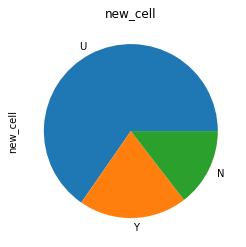

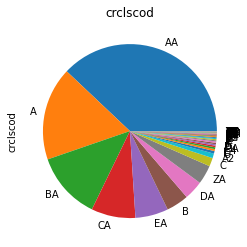

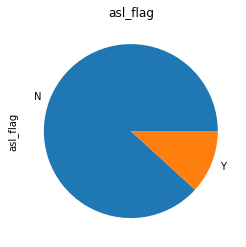

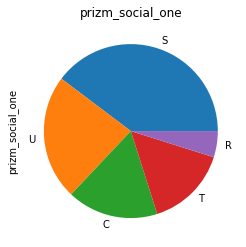

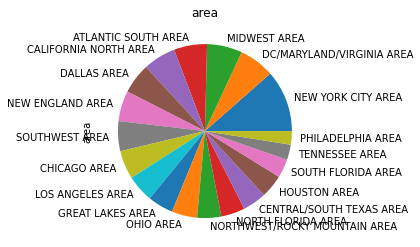

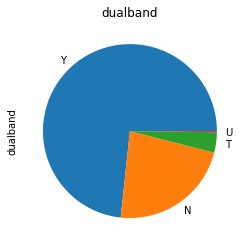

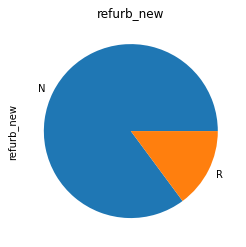

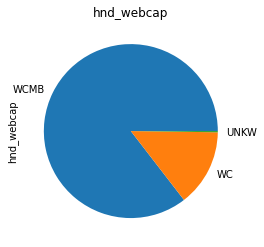

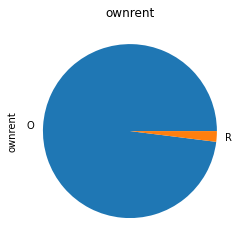

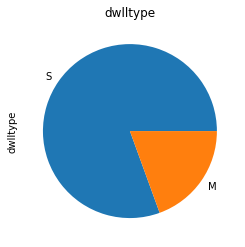

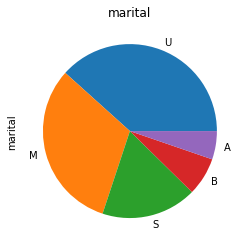

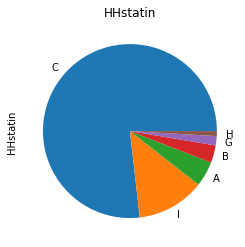

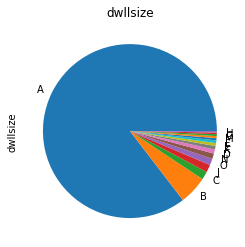

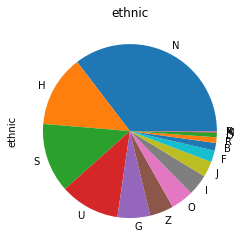

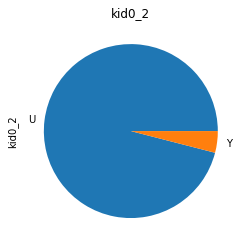

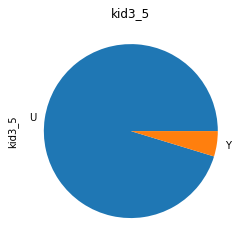

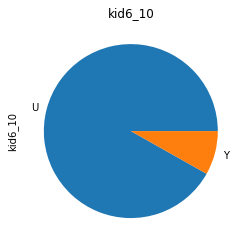

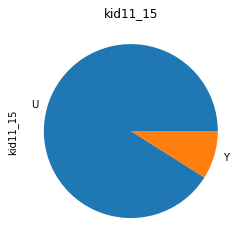

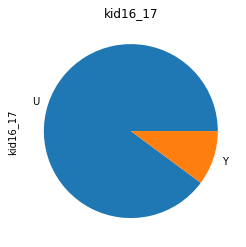

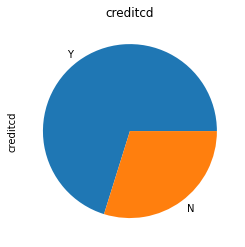

In [ ]:
for col in categorical_cols:
    df[col].value_counts().plot(kind='pie')
    plt.title(col)
    plt.show()

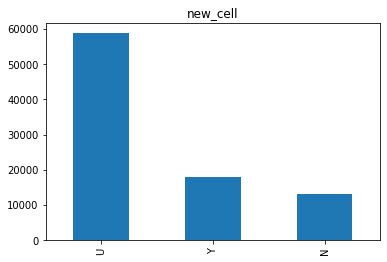

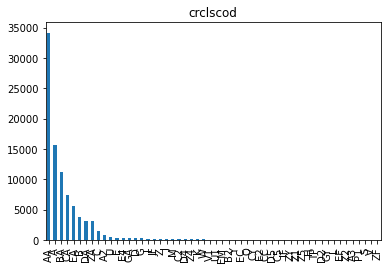

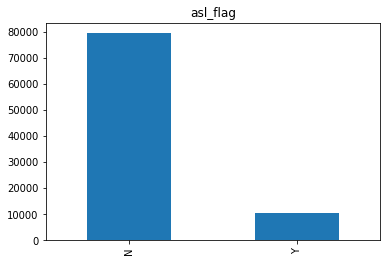

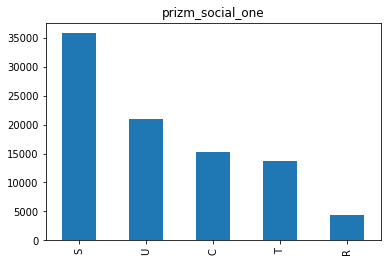

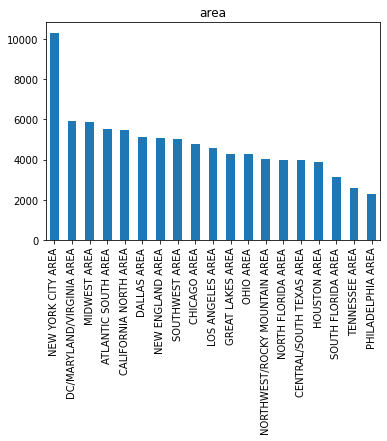

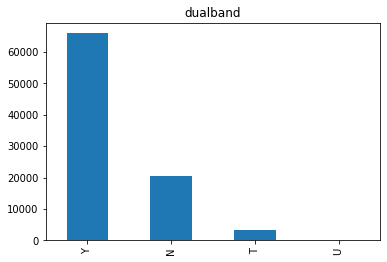

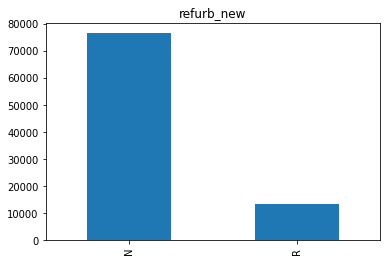

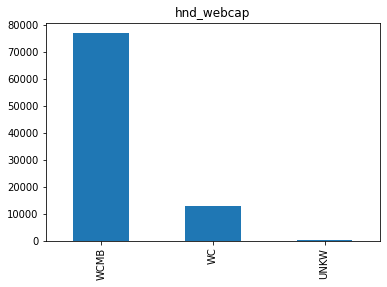

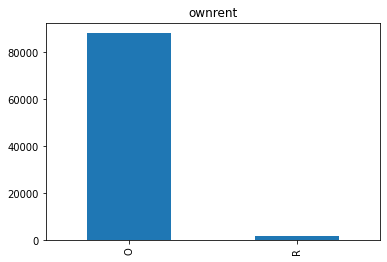

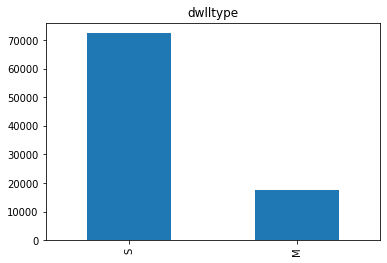

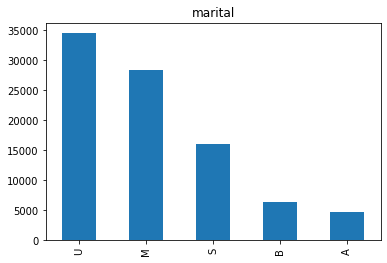

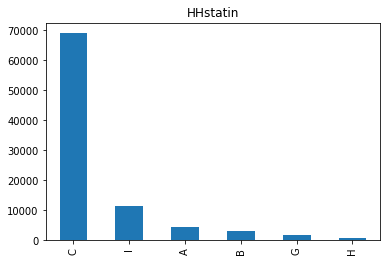

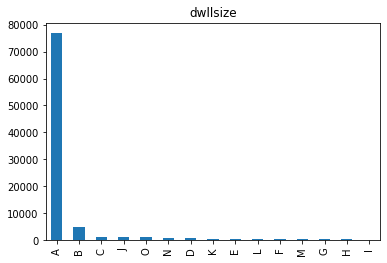

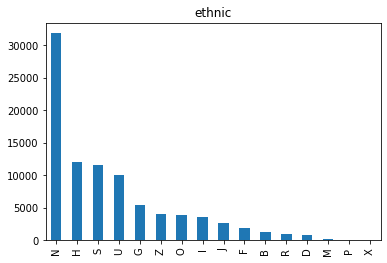

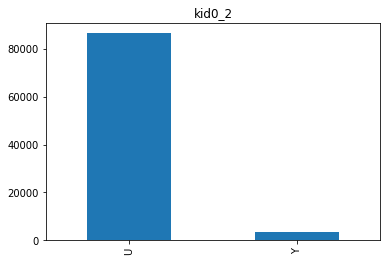

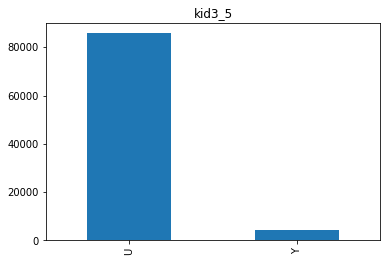

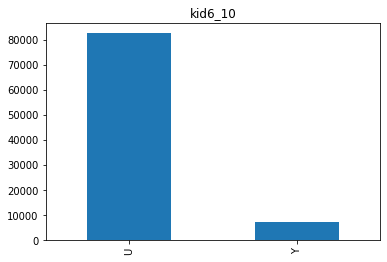

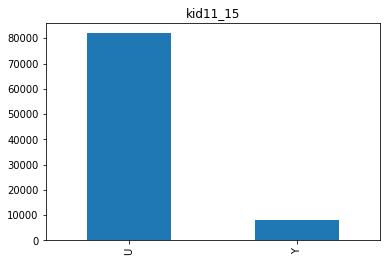

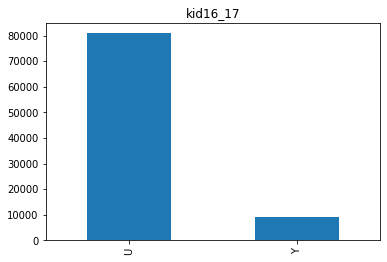

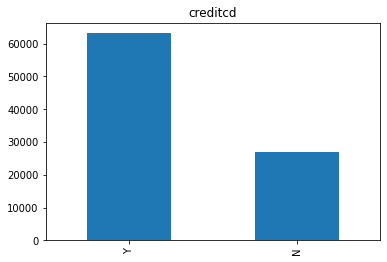

In [ ]:
for col in categorical_cols:
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

##1. primz_social_one

Vemos que en esta variable hay un orden ordinal, las letras S, U, C, T y R corresponden a diferentes segmentos de consumidores y se utilizan para clasificar a las personas en diferentes categorías, según su comportamiento social y estilo de vida.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 98 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev               90000 non-null  float64
 1   mou               90000 non-null  float64
 2   totmrc            90000 non-null  float64
 3   da                90000 non-null  float64
 4   ovrmou            90000 non-null  float64
 5   ovrrev            90000 non-null  float64
 6   vceovr            90000 non-null  float64
 7   datovr            90000 non-null  float64
 8   roam              90000 non-null  float64
 9   change_mou        90000 non-null  float64
 10  change_rev        90000 non-null  float64
 11  drop_vce          90000 non-null  float64
 12  drop_dat          90000 non-null  float64
 13  blck_vce          90000 non-null  float64
 14  blck_dat          90000 non-null  float64
 15  unan_vce          90000 non-null  float64
 16  unan_dat          90000 non-null  float6

In [ ]:
ordinal_primz_social = {
    'S': 1,
    'U': 2,
    'C': 3,
    'T': 4,
    'R': 5,

}
df['prizm_social_one'] = df['prizm_social_one'].replace(ordinal_primz_social).astype('int')

##2. AREA

Agrupamos el área en 4 regiones de estados unidos

In [ ]:

# Definir un diccionario para mapear las categorías a las regiones geográficas
region_dict = {
    'NORTHWEST/ROCKY MOUNTAIN AREA': 'west',
    'CHICAGO AREA': 'midwest',
    'GREAT LAKES AREA': 'midwest',
    'NEW ENGLAND AREA': 'north',
    'DALLAS AREA': 'south',
    'CENTRAL/SOUTH TEXAS AREA': 'south',
    'TENNESSEE AREA': 'south',
    'MIDWEST AREA': 'midwest',
    'PHILADELPHIA AREA': 'north',
    'OHIO AREA': 'midwest',
    'HOUSTON AREA': 'south',
    'SOUTHWEST AREA': 'south',
    'NEW YORK CITY AREA': 'north',
    'ATLANTIC SOUTH AREA': 'south',
    'SOUTH FLORIDA AREA': 'south',
    'CALIFORNIA NORTH AREA': 'west',
    'DC/MARYLAND/VIRGINIA AREA': 'south',
    'NORTH FLORIDA AREA': 'south',
    'LOS ANGELES AREA': 'west'
}

# Crear una función que utiliza el diccionario para mapear las categorías a las regiones geográficas
def map_region(x):
    if x in region_dict:
        return region_dict[x]
    else:
        return None

# Aplicar la función al DataFrame y guardar los resultados en una nueva columna llamada 'region'
df['region'] = df['area'].apply(map_region)

# Imprimir el resultado
print(df)


            rev     mou  totmrc      da  ovrmou  ovrrev  vceovr  datovr  \
0       23.9975  219.25  22.500  0.2475    0.00   0.000     0.0   0.000   
1       57.4925  482.75  37.425  0.2475   22.75   9.100     9.1   0.000   
2       16.9900   10.25  16.990  0.0000    0.00   0.000     0.0   0.000   
3       38.0000    7.50  38.000  0.0000    0.00   0.000     0.0   0.000   
4       55.2300  570.50  71.980  0.0000    0.00   0.000     0.0   0.000   
...         ...     ...     ...     ...     ...     ...     ...     ...   
89995  125.2700  936.25  79.990  0.0000  131.75  52.700    52.7   0.000   
89996   72.7450  455.00  69.990  0.9900   29.50  11.765    10.4   1.365   
89997   59.7300  830.50  59.990  0.7425   22.25   8.900     8.9   0.000   
89998   53.1350  152.00  69.990  0.0000    0.00   0.000     0.0   0.000   
89999   14.2000  164.25  10.000  0.0000   10.50   4.200     4.2   0.000   

         roam  change_mou  change_rev   drop_vce  drop_dat  blck_vce  \
0      0.0000     -157.25  

In [ ]:
del(df['area'])
categorical_cols.append('region')
categorical_cols.remove('area')

## 3. Dwllsize

Las letras A, B, C, J, O, N, D, K, E, L, F, M, G, H e I se utilizan para representar diferentes categorías de tamaño de vivienda. A continuación, te proporciono una

In [ ]:
ordinal_dwllsize = {
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5,
    'F': 6,
    'G': 7,
    'H': 8,
    'I': 9,
    'J' : 10,
    'K' : 11,
    'L' : 12,
    'M' : 13,
    'N': 14,
    'O' : 15,
}
df['dwllsize'] = df['dwllsize'].replace(ordinal_dwllsize).astype('int')

##4. Kids

Decidimos agrupar los hijos en una única columna 'boolean' que indica si el cliente tiene hijos o no.

In [ ]:
df["tiene_hijos_menores"] = df[["kid0_2","kid3_5","kid6_10","kid11_15","kid16_17"]].apply(lambda x: "Y" if any(x == "Y") else "U", axis=1)
df.drop(["kid0_2", "kid3_5", "kid6_10", "kid11_15", "kid16_17"], axis=1, inplace=True)

In [ ]:
categorical_cols.append('tiene_hijos_menores') #añadimos la nueva columna creada a la lista de variables numericas

In [ ]:
delete = ['kid0_2',
 'kid3_5',
 'kid6_10',
 'kid11_15',
 'kid16_17',]

categorical_cols = [nombre for nombre in categorical_cols if nombre not in delete]

##Empezamos con el análissi de las numericas

Creamos una nueva variable que es el resultado de la suma de las llamadas fallidas.

Estas variables proporcionan una medida de la calidad de la red de telecomunicaciones móviles en términos de la capacidad para establecer y mantener conexiones de voz y datos sin interrupciones o bloqueos debido a limitaciones de capacidad.

In [ ]:
df['mean_call_failure'] = df[['blck_dat','blck_vce','drop_vce','drop_dat']].sum(axis=1)

In [ ]:
df['mean_call_failure'].describe()

count    90000.000000
mean         9.826661
std         15.081650
min          0.000000
25%          1.666667
50%          5.333333
75%         12.000000
max        420.000000
Name: mean_call_failure, dtype: float64

In [ ]:
 # Calcula la media de la columna de llamadas fallidas

def nueva_func(valor):
    if valor <= 50:
        return 0
    else:
        return 1

df['mean_call_failure'] = df['mean_call_failure'].apply(nueva_func)

In [ ]:
df['mean_call_failure'].value_counts()

0    88026
1     1974
Name: mean_call_failure, dtype: int64

In [ ]:
el = ['blck_dat','blck_vce','drop_vce','drop_dat']


numeric_cols = [nombre for nombre in numeric_cols if nombre not in el]

In [ ]:
del(df['blck_dat'])
del(df['blck_vce'])
del(df['drop_vce'])
del(df['drop_dat'])

In [ ]:
df['custcare'].describe()

count    90000.000000
mean         1.648754
std          5.148484
min          0.000000
25%          0.000000
50%          0.000000
75%          1.333333
max        675.333333
Name: custcare, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 91 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rev                  90000 non-null  float64
 1   mou                  90000 non-null  float64
 2   totmrc               90000 non-null  float64
 3   da                   90000 non-null  float64
 4   ovrmou               90000 non-null  float64
 5   ovrrev               90000 non-null  float64
 6   vceovr               90000 non-null  float64
 7   datovr               90000 non-null  float64
 8   roam                 90000 non-null  float64
 9   change_mou           90000 non-null  float64
 10  change_rev           90000 non-null  float64
 11  unan_vce             90000 non-null  float64
 12  unan_dat             90000 non-null  float64
 13  plcd_vce             90000 non-null  float64
 14  plcd_dat             90000 non-null  float64
 15  recv_vce             90000 non-null 

yo personalmente eliminaria las columnas d kidsssss pero como veais

### Univariate analysis

* En numericas .describe() para describir, KDEplots, distplots o histogramas en variables numericas para visualizar.
* En categoricas .value_counts() para describir, countplots o barplots para visualizar.

In [ ]:
for col in numeric_cols:
  print(df[col].describe())

count    90000.000000
mean        58.270725
std         46.062730
min         -5.862500
25%         32.985000
50%         47.578750
75%         70.123750
max       3843.262500
Name: rev, dtype: float64
count    90000.000000
mean       503.527132
std        516.152009
min          0.000000
25%        147.750000
50%        348.500000
75%        688.062500
max      12206.750000
Name: mou, dtype: float64
count    90000.000000
mean        45.880669
std         23.353031
min        -26.915000
25%         30.000000
50%         44.990000
75%         59.990000
max        409.990000
Name: totmrc, dtype: float64
count    90000.000000
mean         0.876506
std          2.172310
min          0.000000
25%          0.000000
50%          0.247500
75%          0.742500
max        159.390000
Name: da, dtype: float64
count    90000.000000
mean        40.738231
std         96.911171
min          0.000000
25%          0.000000
50%          2.500000
75%         41.250000
max       4320.750000
Name: ovrmou, 

In [ ]:
numeric_cols

[[<Axes: title={'center': 'rev'}>]]
[[<Axes: title={'center': 'mou'}>]]
[[<Axes: title={'center': 'totmrc'}>]]
[[<Axes: title={'center': 'da'}>]]
[[<Axes: title={'center': 'ovrmou'}>]]
[[<Axes: title={'center': 'ovrrev'}>]]
[[<Axes: title={'center': 'vceovr'}>]]
[[<Axes: title={'center': 'datovr'}>]]
[[<Axes: title={'center': 'roam'}>]]
[[<Axes: title={'center': 'change_mou'}>]]
[[<Axes: title={'center': 'change_rev'}>]]
[[<Axes: title={'center': 'unan_vce'}>]]
[[<Axes: title={'center': 'unan_dat'}>]]
[[<Axes: title={'center': 'plcd_vce'}>]]
[[<Axes: title={'center': 'plcd_dat'}>]]
[[<Axes: title={'center': 'recv_vce'}>]]
[[<Axes: title={'center': 'recv_sms'}>]]
[[<Axes: title={'center': 'comp_vce'}>]]
[[<Axes: title={'center': 'comp_dat'}>]]
[[<Axes: title={'center': 'custcare'}>]]
[[<Axes: title={'center': 'ccrndmou'}>]]
[[<Axes: title={'center': 'cc_mou'}>]]
[[<Axes: title={'center': 'inonemin'}>]]
[[<Axes: title={'center': 'threeway'}>]]
[[<Axes: title={'center': 'mou_cvce'}>]]
[[<

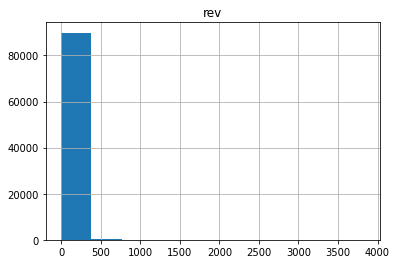

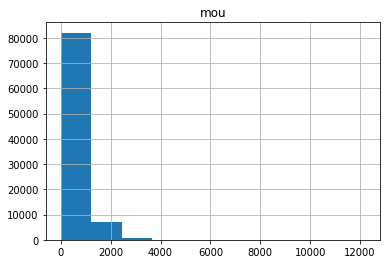

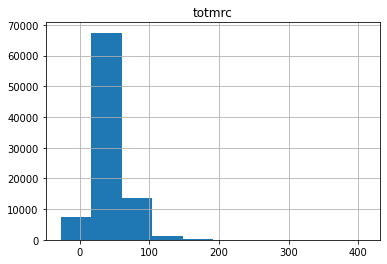

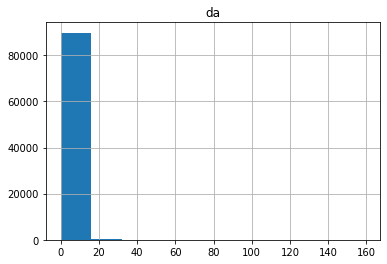

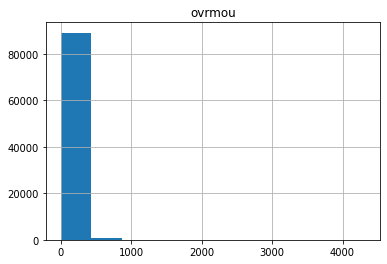

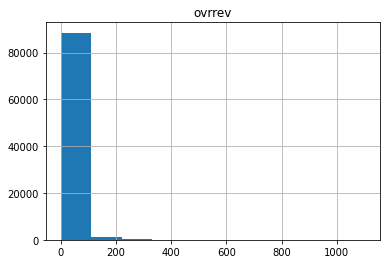

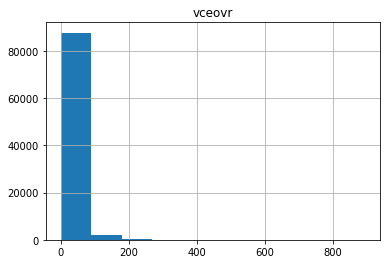

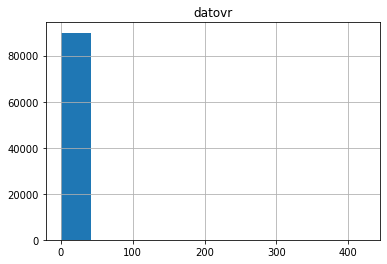

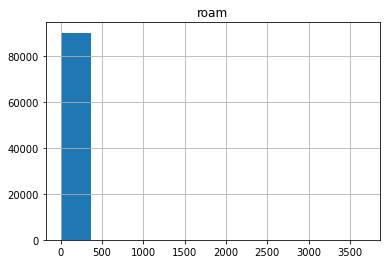

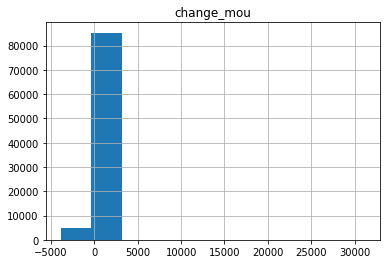

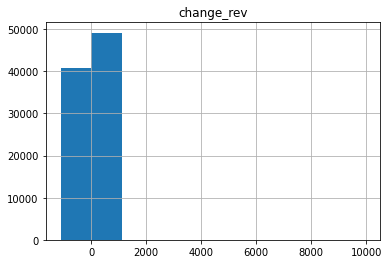

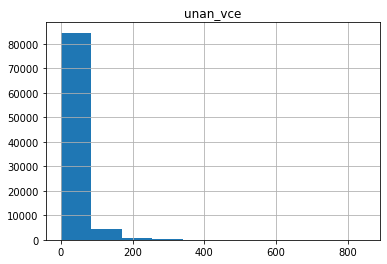

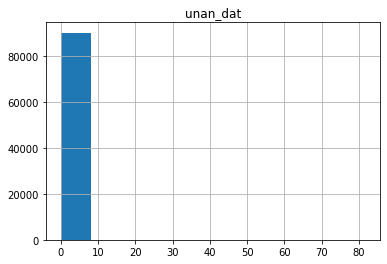

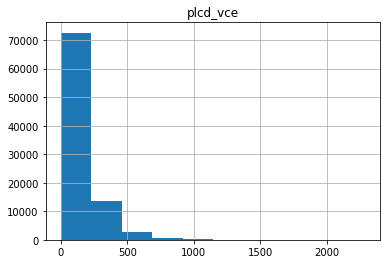

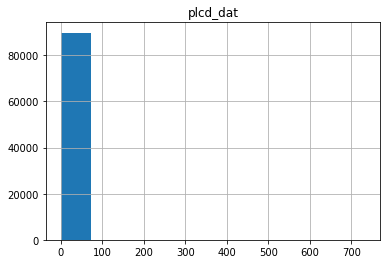

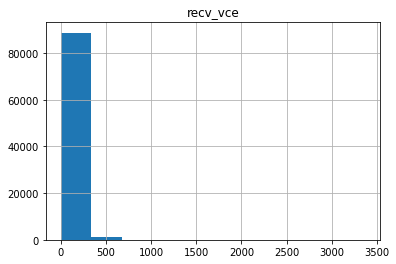

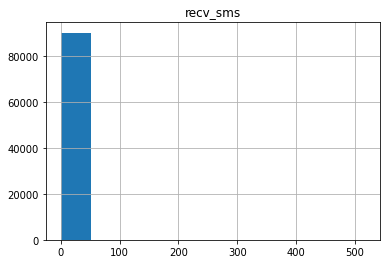

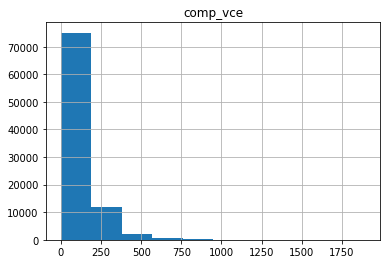

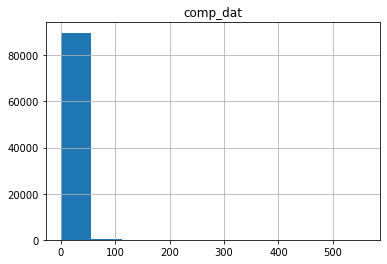

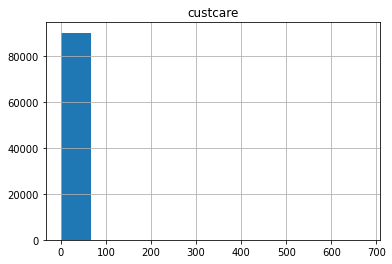

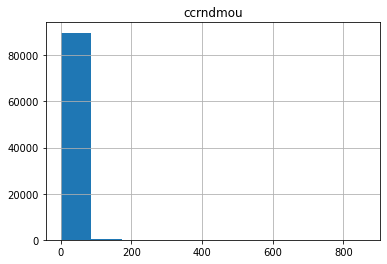

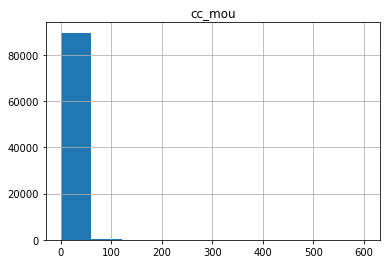

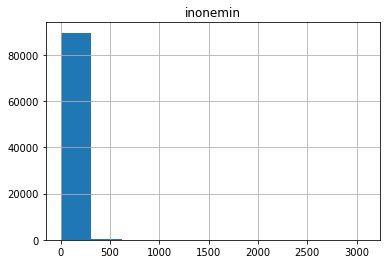

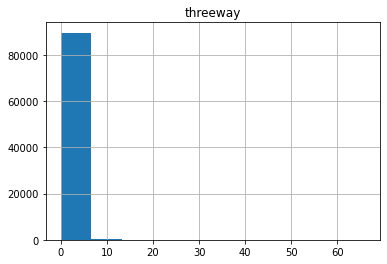

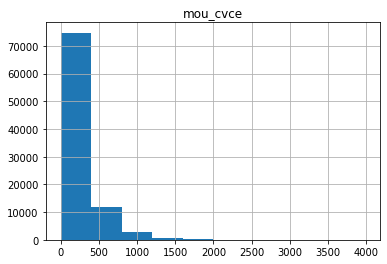

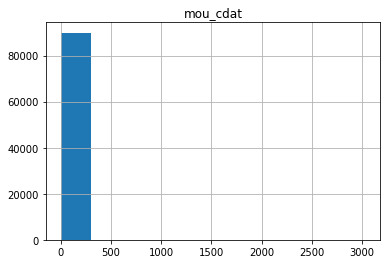

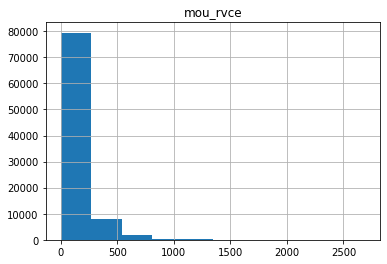

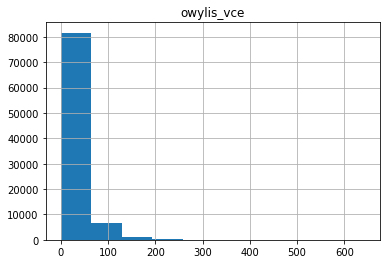

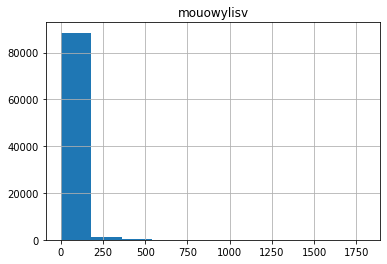

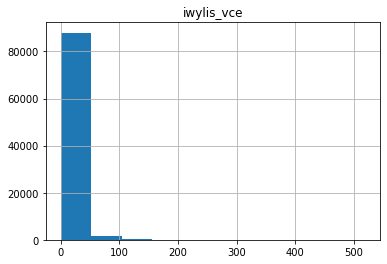

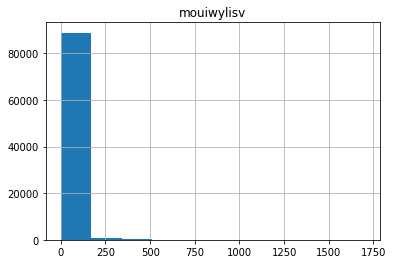

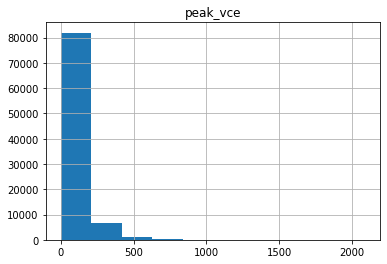

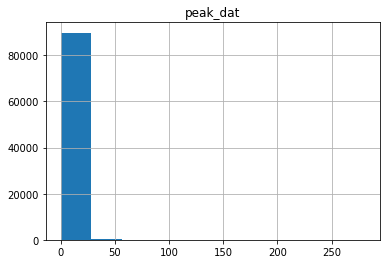

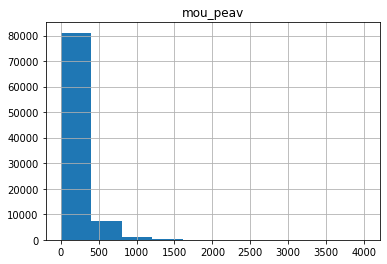

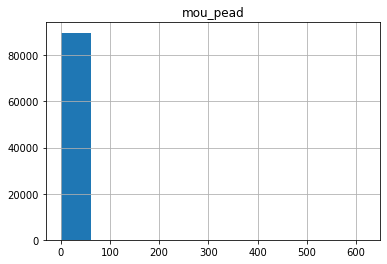

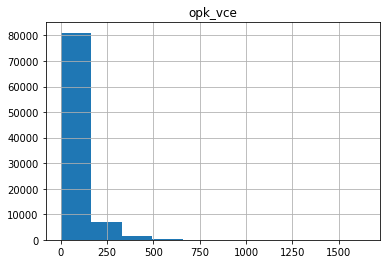

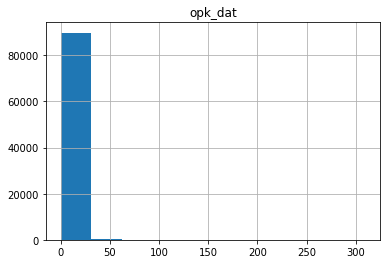

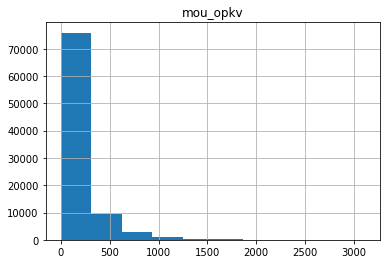

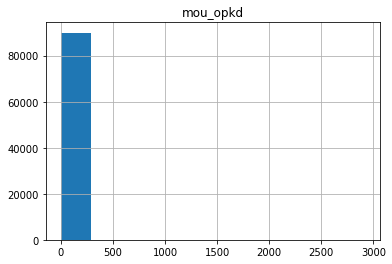

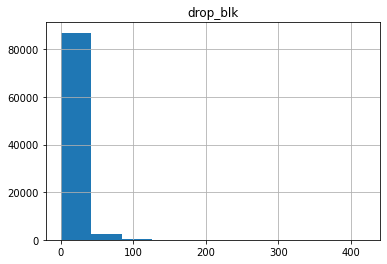

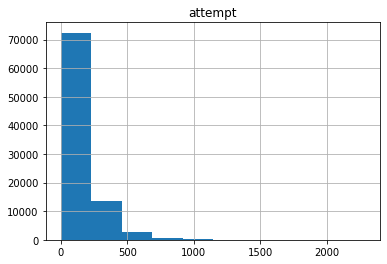

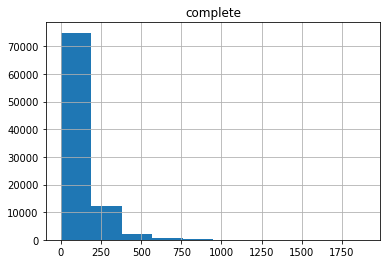

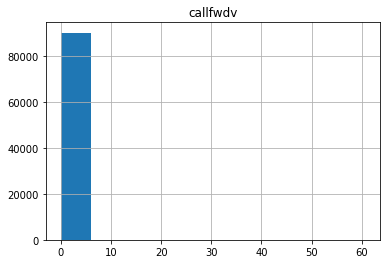

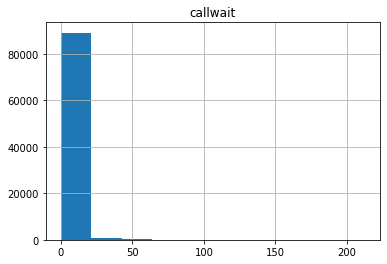

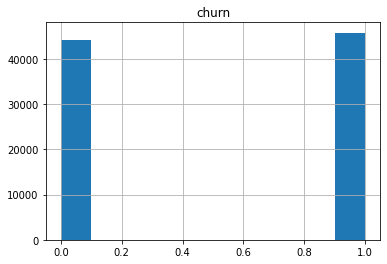

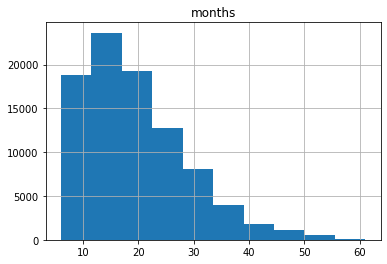

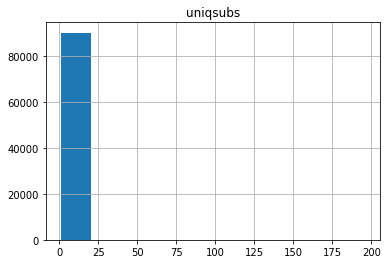

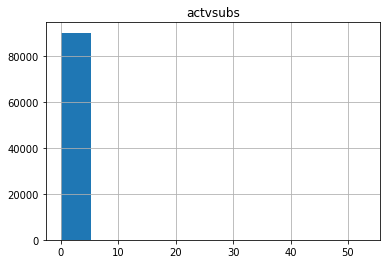

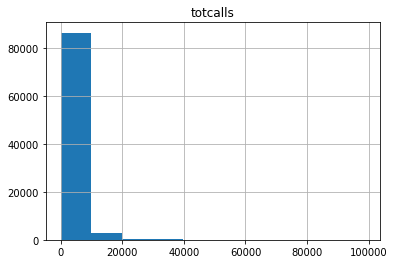

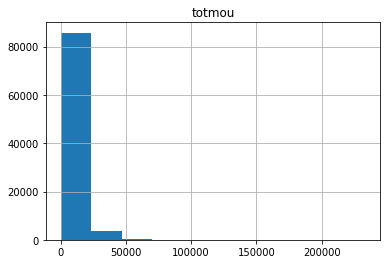

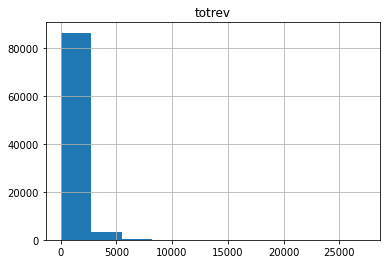

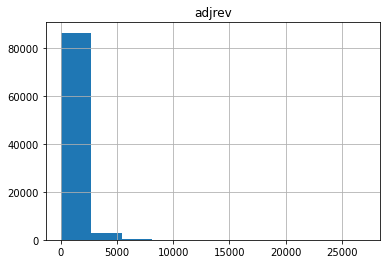

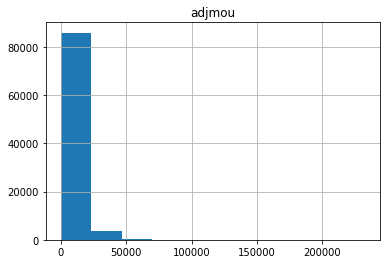

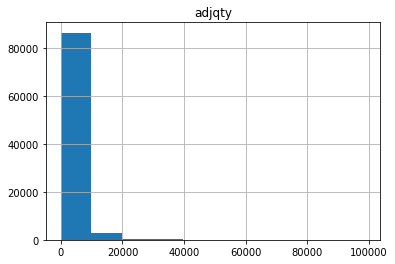

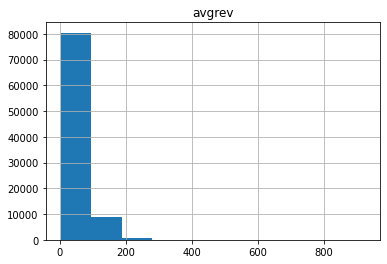

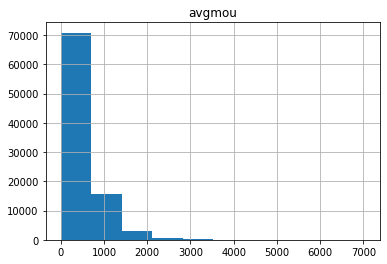

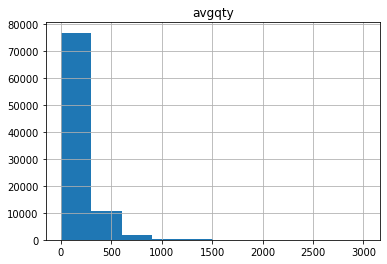

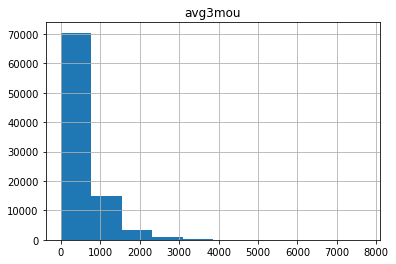

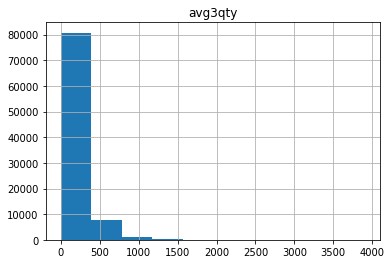

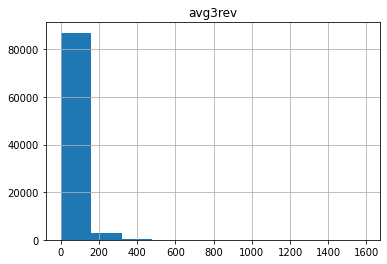

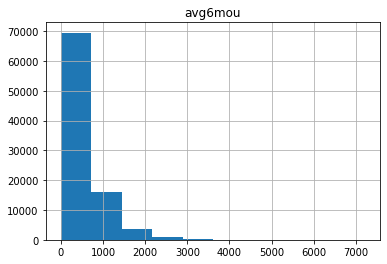

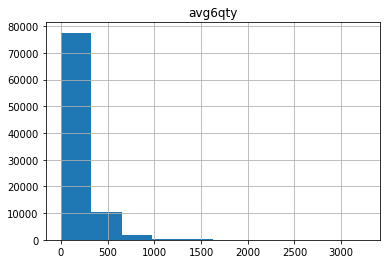

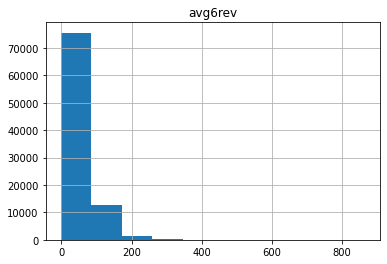

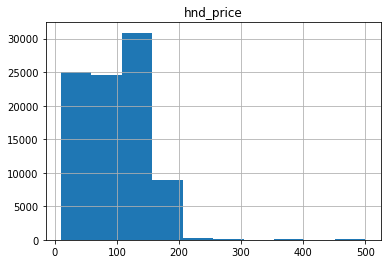

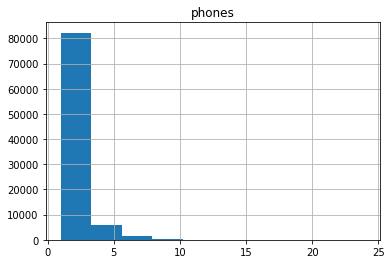

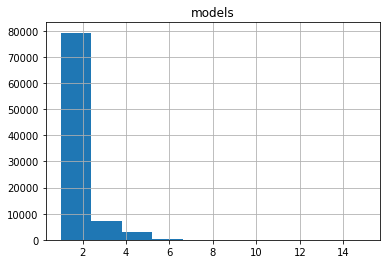

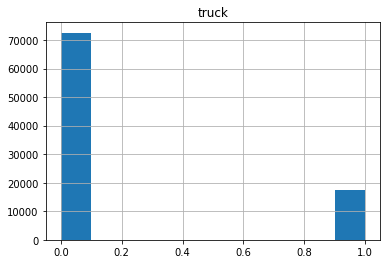

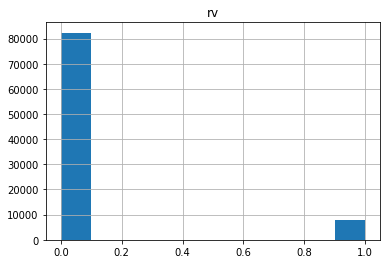

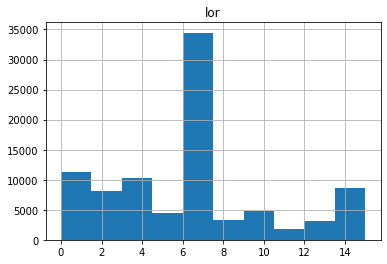

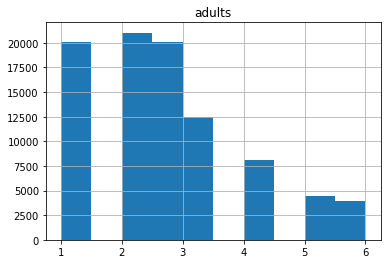

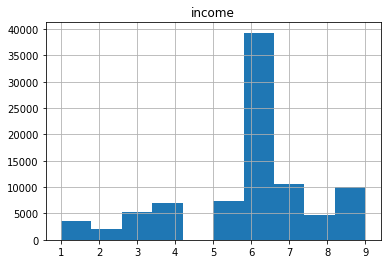

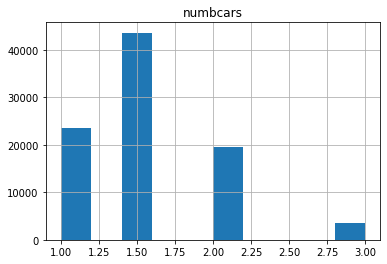

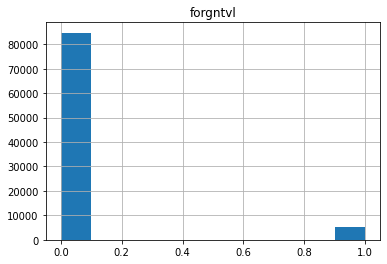

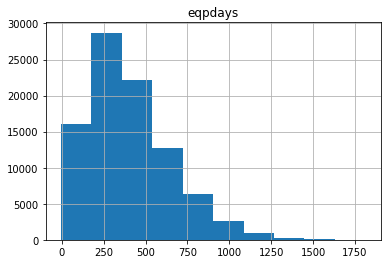

In [ ]:
for i in numeric_cols:
  print(df.hist(i))

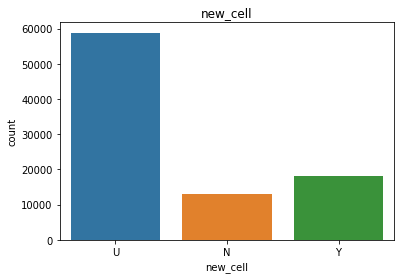

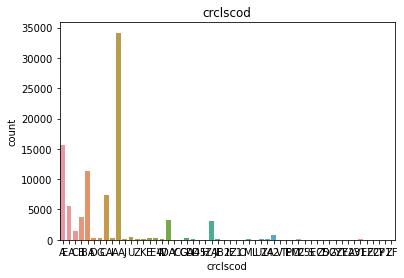

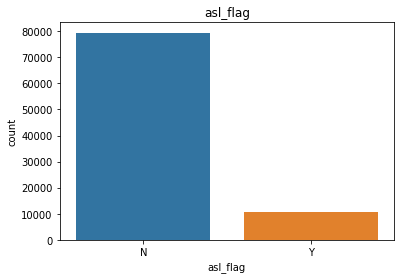

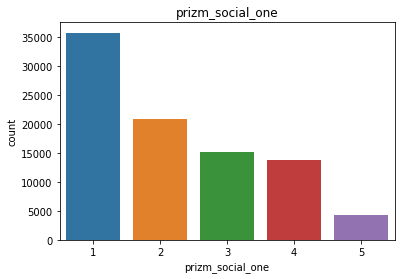

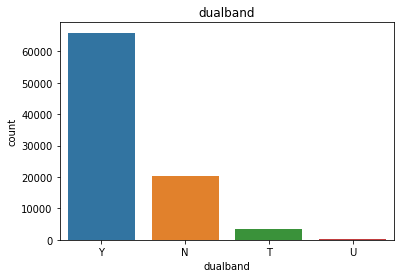

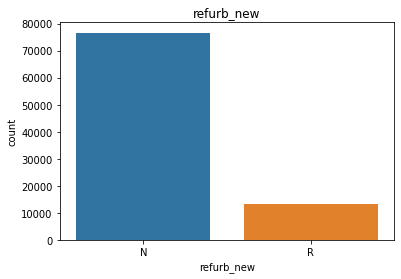

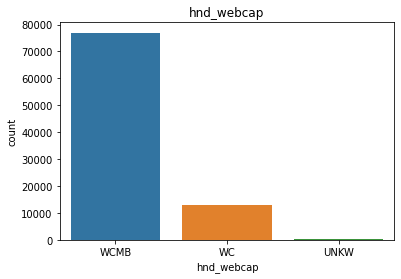

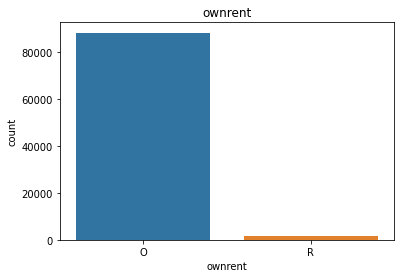

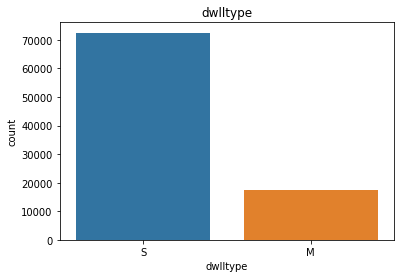

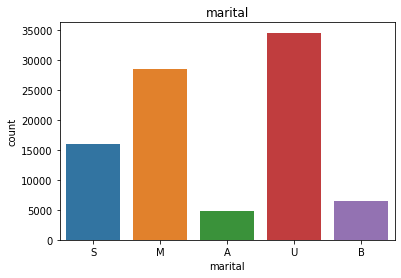

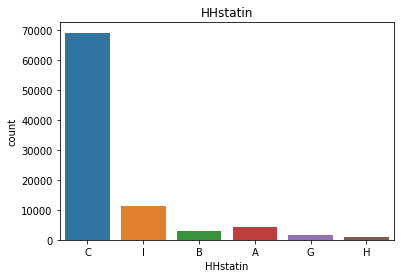

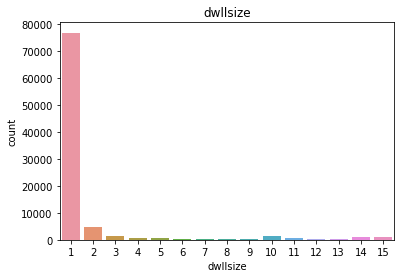

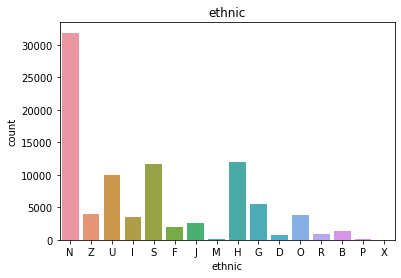

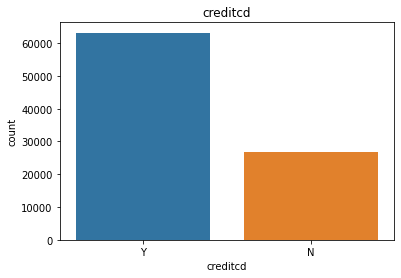

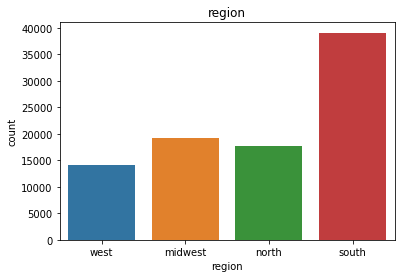

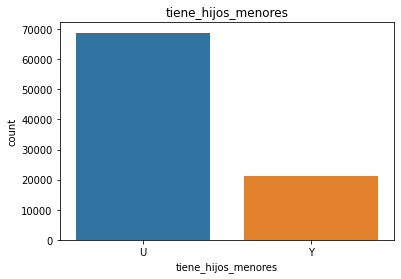

In [ ]:
for col in categorical_cols:
    sns.countplot(x=col, data=df)
    plt.title(col)
    plt.show()

* si el tamaño del dataset lo permite (<20 variables)
* scatterplotmatrix(), heatmap's correlation, etc

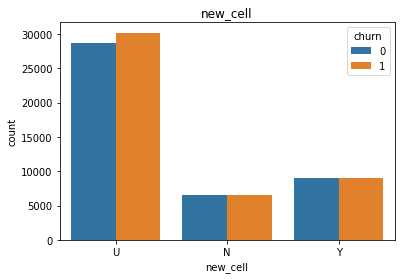

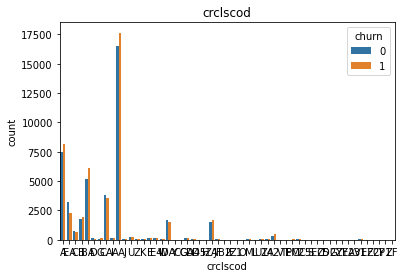

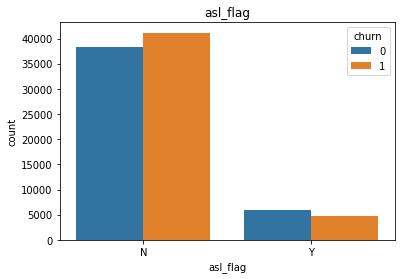

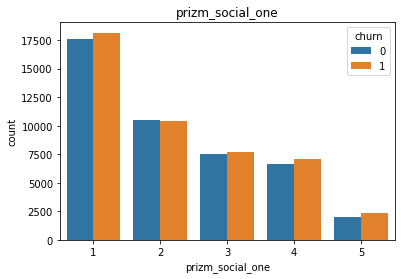

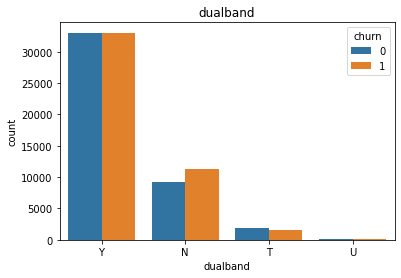

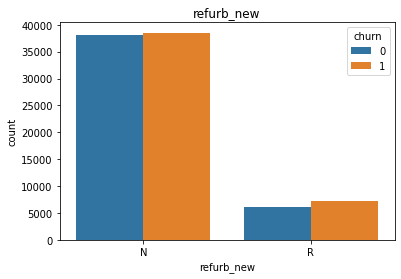

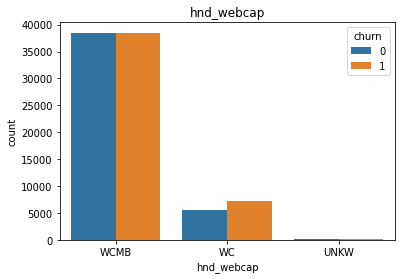

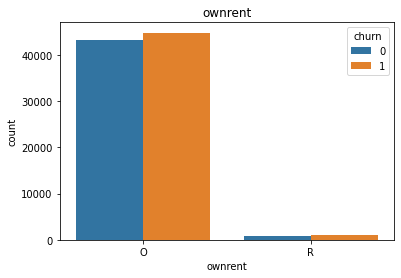

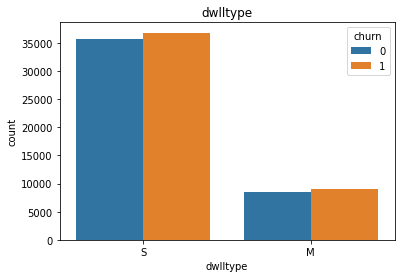

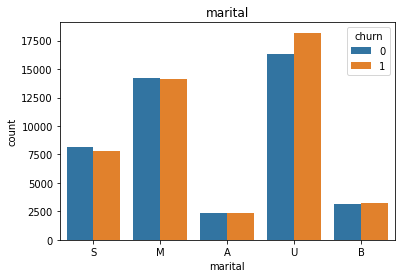

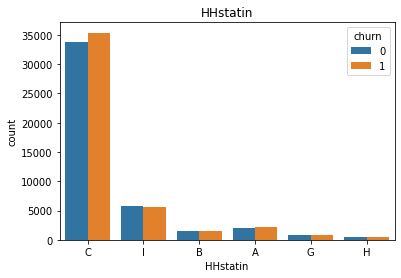

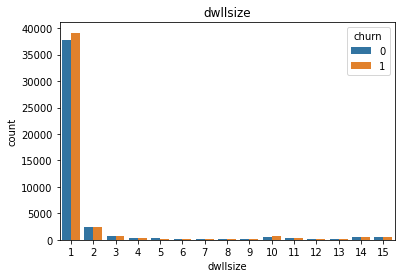

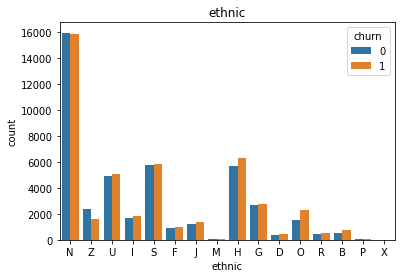

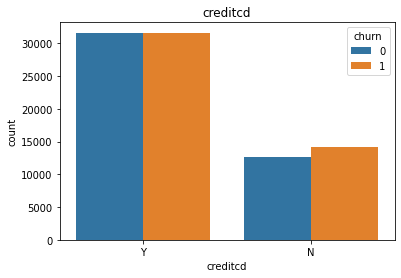

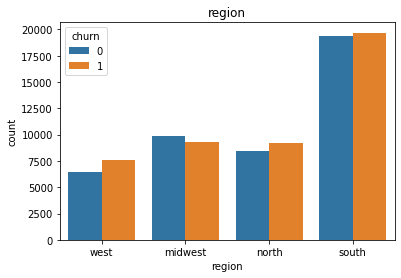

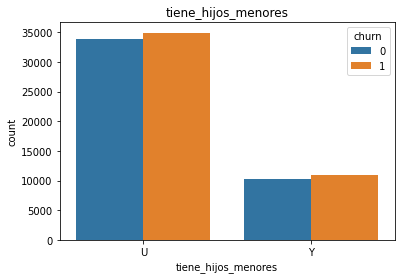

In [ ]:
for col in categorical_cols: #graficamos las variables en base al target para observar si influyen o no a simple vista
    sns.countplot(x=col, data=df,hue='churn')
    plt.title(col)
    plt.show()

In [ ]:

df1=pd.get_dummies(data=df,columns = categorical_cols)

In [ ]:
df1

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,churn,months,uniqsubs,actvsubs,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,hnd_price,phones,models,truck,rv,lor,adults,income,numbcars,forgntvl,eqpdays,mean_call_failure,new_cell_N,new_cell_U,new_cell_Y,crclscod_A,crclscod_A2,crclscod_A3,crclscod_AA,crclscod_B,crclscod_B2,crclscod_BA,crclscod_C,crclscod_C2,crclscod_C5,crclscod_CA,crclscod_CC,crclscod_CY,crclscod_D,crclscod_D2,crclscod_D4,crclscod_D5,crclscod_DA,crclscod_E,crclscod_E2,crclscod_E4,crclscod_EA,crclscod_EC,crclscod_EF,crclscod_EM,crclscod_G,crclscod_GA,crclscod_GY,crclscod_H,crclscod_I,crclscod_IF,crclscod_J,crclscod_JF,crclscod_K,crclscod_L,crclscod_M,crclscod_O,crclscod_P1,crclscod_S,crclscod_TP,crclscod_U,crclscod_U1,crclscod_V,crclscod_V1,crclscod_W,crclscod_Y,crclscod_Z,crclscod_Z1,crclscod_Z2,crclscod_Z4,crclscod_Z5,crclscod_ZA,crclscod_ZF,crclscod_ZY,asl_flag_N,asl_flag_Y,prizm_social_one_1,prizm_social_one_2,prizm_social_one_3,prizm_social_one_4,prizm_social_one_5,dualband_N,dualband_T,dualband_U,dualband_Y,refurb_new_N,refurb_new_R,hnd_webcap_UNKW,hnd_webcap_WC,hnd_webcap_WCMB,ownrent_O,ownrent_R,dwlltype_M,dwlltype_S,marital_A,marital_B,marital_M,marital_S,marital_U,HHstatin_A,HHstatin_B,HHstatin_C,HHstatin_G,HHstatin_H,HHstatin_I,dwllsize_1,dwllsize_2,dwllsize_3,dwllsize_4,dwllsize_5,dwllsize_6,dwllsize_7,dwllsize_8,dwllsize_9,dwllsize_10,dwllsize_11,dwllsize_12,dwllsize_13,dwllsize_14,dwllsize_15,ethnic_B,ethnic_D,ethnic_F,ethnic_G,ethnic_H,ethnic_I,ethnic_J,ethnic_M,ethnic_N,ethnic_O,ethnic_P,ethnic_R,ethnic_S,ethnic_U,ethnic_X,ethnic_Z,creditcd_N,creditcd_Y,region_midwest,region_north,region_south,region_west,tiene_hijos_menores_U,tiene_hijos_menores_Y
0,23.9975,219.25,22.500,0.2475,0.00,0.000,0.0,0.000,0.0000,-157.25,-18.9975,6.333333,0.000000,52.333333,0.000000,42.333333,0.0,45.000000,0.0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61,2,1,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,149.989990,2.0,2.0,0.0,0.0,15.0,1.0,4.0,3.0,0.0,361.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
1,57.4925,482.75,37.425,0.2475,22.75,9.100,9.1,0.000,0.0000,532.25,50.9875,61.333333,0.000000,263.333333,0.000000,69.000000,0.0,193.333333,0.0,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,0,56,1,1,14654,26400.00000,2851.68,2833.88,26367.00,14624,51.53,479.40,265.89,305,158,40,477.0,275.0,48.0,99.709575,7.0,6.0,1.0,1.0,1.0,1.0,5.0,1.0,0.0,240.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0
2,16.9900,10.25,16.990,0.0000,0.00,0.000,0.0,0.000,0.0000,-4.25,0.0000,2.666667,0.000000,9.000000,0.000000,0.333333,0.0,6.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,5.193333,0.0,1.000000,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.0,0.000000,1,58,1,1,7903,24385.05333,2155.91,1934.47,24303.

### Multivariate analysis

## Encoding categories

* Si tienen escala, asignar valor numerico dentro de escala (ejemplo: "1-Bajo, 2-Medio, 3-Alto") (.replace)
* One Hot Encoding en resto de categoricos (pd.get_dummies())

In [ ]:
target = 'churn'
features = df1.columns[df1.columns != target]

In [ ]:
def highly_correlated(df, target, threshold):
    col_corr = list()
    colnames = list()
    rownames = list()
    y = df[target]
    X = df[df.columns[df.columns != target]]
    corr_matrix = X.corr().abs()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colnames.append(corr_matrix.columns[i]) # getting the name of column
                rownames.append(corr_matrix.index[j])
                col_corr.append(corr_matrix.iloc[i, j])
    Z = pd.DataFrame({'F1':colnames,
                      'F2':rownames,
                      'corr_F1_F2':col_corr,
                      'corr_F1_target': [np.abs(np.corrcoef(X[i],y)[0,1]) for i in colnames],
                      'corr_F2_target': [np.abs(np.corrcoef(X[i],y)[0,1]) for i in rownames]
                      })
    Z['F_to_delete'] = rownames
    Z['F_to_delete'][Z['corr_F1_target'] < Z['corr_F2_target']] = Z['F1'][Z['corr_F1_target'] < Z['corr_F2_target']]
    
    return Z

In [ ]:
highly_correlated(df1,target,0.95)

,F1,F2,corr_F1_F2,corr_F1_target,corr_F2_target,F_to_delete
0,ovrrev,ovrmou,0.957412,0.020789,0.015764,ovrmou
1,vceovr,ovrmou,0.954818,0.020995,0.015764,ovrmou
2,vceovr,ovrrev,0.994998,0.020995,0.020789,ovrrev
3,comp_vce,plcd_vce,0.985686,0.050651,0.047029,plcd_vce
4,comp_dat,plcd_dat,0.990591,0.007206,0.007389,comp_dat
5,cc_mou,ccrndmou,0.988749,0.032771,0.034388,cc_mou
6,inonemin,recv_vce,0.965997,0.033247,0.040898,inonemin
7,mou_opkd,mou_cdat,0.960178,0.008218,0.008764,mou_opkd
8,attempt,plcd_vce,0.998551,0.047133,0.047029,plcd_vce
9,attempt,comp_vce,0.984313,0.047133,0.050651,attempt


## Remove High-Correlation

* Analizar variables (X) altamente correlacionadas
* Eliminar una variable de cada pareja altmente correlacionada (>95% o >99%...) en el dataset (df)

In [ ]:
df2 = df1.copy()

In [ ]:
corr_matrix = df2.corr().abs()

# Crear una lista para almacenar las variables altamente correlacionadas
high_corr_vars = []

# Iterar sobre la matriz de correlación y agregar a la lista las variables que tengan un valor de correlación mayor a 0.9
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if corr_matrix.iloc[i, j] >= 0.9:
            high_corr_vars.append(corr_matrix.columns[j])

# Eliminar una de las variables altamente correlacionadas
df2.drop(high_corr_vars, axis=1, inplace=True)

In [ ]:
highly_correlated(df2,target,0.95) #vemos. qya n hay variables altamente correlaionadas

,F1,F2,corr_F1_F2,corr_F1_target,corr_F2_target,F_to_delete


## Remove Low-Variance

* Eliminamos variables (X) practicamente constantes con un threshold minimo (1% o menos)

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:

vt = VarianceThreshold(threshold = 0.01) #Eliminamos columnas donde el 99% de los valores son iguales
vt.fit(df2)

cols_lowvar = df2.columns[vt.get_support()==False]

df2.drop(columns=cols_lowvar, inplace=True)

print(len(cols_lowvar),' low variance features were removed:\n', cols_lowvar.to_list())


61  low variance features were removed:
 ['crclscod_A2', 'crclscod_A3', 'crclscod_B2', 'crclscod_C2', 'crclscod_C5', 'crclscod_CC', 'crclscod_CY', 'crclscod_D', 'crclscod_D2', 'crclscod_D4', 'crclscod_D5', 'crclscod_E', 'crclscod_E2', 'crclscod_E4', 'crclscod_EC', 'crclscod_EF', 'crclscod_EM', 'crclscod_G', 'crclscod_GA', 'crclscod_GY', 'crclscod_H', 'crclscod_I', 'crclscod_IF', 'crclscod_J', 'crclscod_JF', 'crclscod_K', 'crclscod_L', 'crclscod_M', 'crclscod_O', 'crclscod_P1', 'crclscod_S', 'crclscod_TP', 'crclscod_U', 'crclscod_U1', 'crclscod_V', 'crclscod_V1', 'crclscod_W', 'crclscod_Y', 'crclscod_Z', 'crclscod_Z1', 'crclscod_Z2', 'crclscod_Z4', 'crclscod_Z5', 'crclscod_ZF', 'crclscod_ZY', 'dualband_U', 'HHstatin_H', 'dwllsize_4', 'dwllsize_5', 'dwllsize_6', 'dwllsize_7', 'dwllsize_8', 'dwllsize_9', 'dwllsize_11', 'dwllsize_12', 'dwllsize_13', 'dwllsize_14', 'ethnic_D', 'ethnic_M', 'ethnic_P', 'ethnic_X']


In [ ]:
len(df2.columns)

112

In [ ]:
len(df1.columns)

202

In [ ]:
df3=df2.copy()

In [ ]:
df3.to_csv('/content/drive/MyDrive/FINAL/df3_prepo.csv')